# Advanced Plotting with matplotlib

Figures and main concepts from:  [realpython.com](https://realpython.com/python-matplotlib-guide/#:~:text=A%20Figure%20object%20is%20the,%E2%80%9D%20as%20we%20might%20expect).

:::{admonition} Learning Objectives  
Be able to:
* Read a publically available file directly from google drive
* Use matplotlib's advanced layout features for multiple plots
* Understand the difference between a "figure" and "axes" in matplotlib  
  
Date files needed: 
* [california housing data (csv)](https://drive.google.com/uc?export=download&id=1lcMbOh19eUUhCdvSloNs5mOYLBCMkIgz)  
    * file id: 1lcMbOh19eUUhCdvSloNs5mOYLBCMkIgz
* [county income data (xlsx)](https://drive.google.com/uc?export=download&id=1rmIPRkMAqqfY3TNpWZ13aV4PfuKihguM)  
    * file id: 1rmIPRkMAqqfY3TNpWZ13aV4PfuKihguM  

:::

:::{note}  
You can load data files directly from my google drive by using:  
`raw=pd.read_csv('https://drive.google.com/uc?id=FILE_ID')`  
where "FILE_ID" is the google drive file identifier given previously.  Also, use either `read_csv` or `read_excel` as appropriate. For the california housing data, we would write:  
`raw=pd.read_csv('https://drive.google.com/uc?id=1lcMbOh19eUUhCdvSloNs5mOYLBCMkIgz')`  
:::

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## "Figure" versus "Axes" according to matplotlib

In matplotlib, a "**figure**" is the outer container that might contain multiple plots.  The individual plots are referred to as "**axes**".  That is, we create a set of *axes* for every plot that we want.  The plot itself can contain multiple curves by using multiple plt.plot() commands.  In all of our previous lessons, we have only defined a single set of axes using for example `fig, ax = plt.subplots(nrows=1, ncols=1)`

<img src="../images/Axes_Figures_schematic.png" alt="fig vs axes" width="300px">

Examples  
`fig, ax = plt.subplots(nrows=1, ncols=1)` if we only have one axes (plot)  
`fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)` if we define 2 axes in one figure with the axes named "ax1" and "ax2".  

:::{note}  
The names "fig", "ax1", "ax2" etc are up to you.  There is nothing special about these particular names other than they are descriptive (easy to read) and short.  
:::

## Creating rows and columns of axes

The command ```plt.subplots()``` creates a figure with the number of axes specified by the call. For example,  ```plt.subplots(nrows=2, ncols=3)``` creates a figure with 6 sets of axes (2 rows by 3 columns) as shown below.  

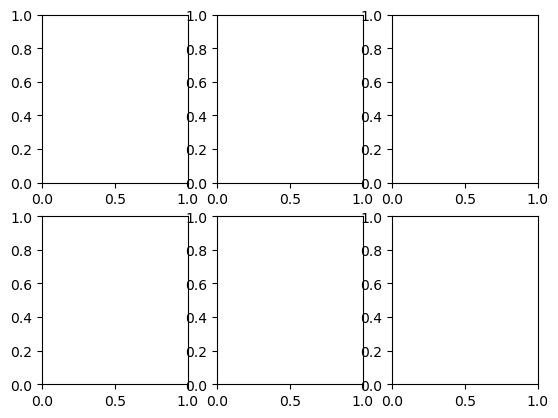

In [3]:
plt.subplots(nrows=2, ncols=3)
plt.show()

To make a plot within one of the axes, we need to access the axes by its name.  We can do this by naming each axes.  We usually call these ax1, ax2, etc. and specify them as a matrix. For example:   
 `fig, ((ax1, ax2, ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2, ncols=3)`    
 `fig, (ax1, ax2, ax3)=plt.subplots(nrows=1, ncols=3)`  
 `fig, (ax1, ax2, ax3)=plt.subplots(nrows=3, ncols=1)`    

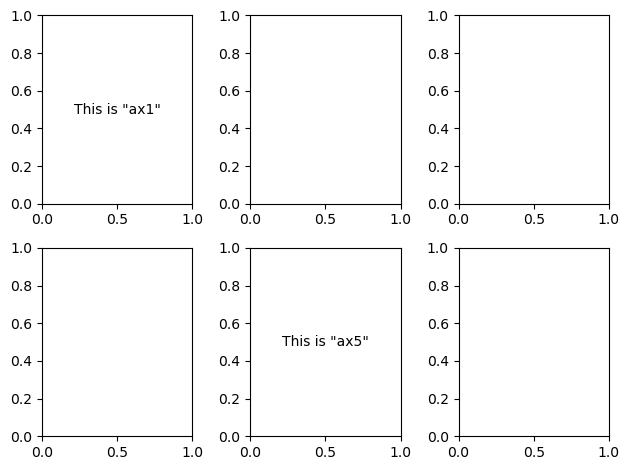

In [7]:
fig, ((ax1, ax2, ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2, ncols=3)
ax1.annotate('This is "ax1"',(0.5,0.5), xycoords='axes fraction', va='center', ha='center')
ax5.annotate('This is "ax5"',(0.5,0.5), xycoords='axes fraction', va='center', ha='center')
fig.tight_layout() # this removes the overlap that we had above
plt.show()

And for 2 axes in a row: 

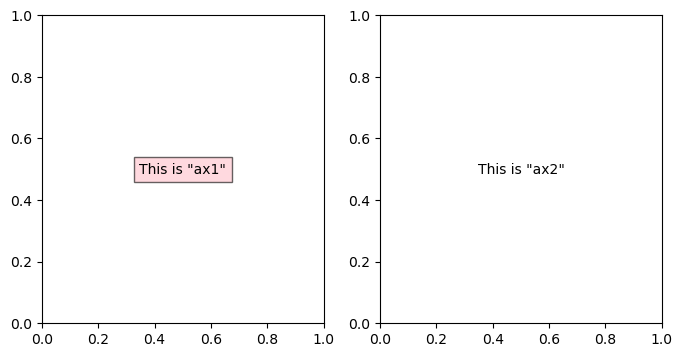

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(8, 4))
ax1.annotate('This is "ax1"',(0.5,0.5), xycoords='axes fraction', va='center', ha='center', bbox=dict(facecolor='pink', alpha=0.6),fontsize=10)
ax2.annotate('This is "ax2"',(0.5,0.5), xycoords='axes fraction', va='center', ha='center')
plt.show()

or for 2 axes in a column:

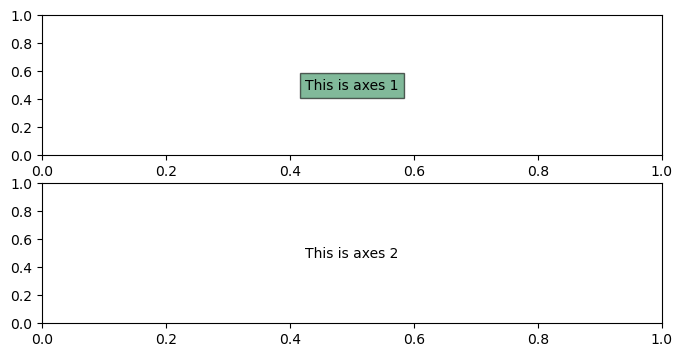

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(8, 4))
ax1.annotate('This is axes 1',(0.5,0.5), xycoords='axes fraction', va='center', ha='center', bbox=dict(facecolor='seagreen', alpha=0.6),fontsize=10)
ax2.annotate('This is axes 2',(0.5,0.5), xycoords='axes fraction', va='center', ha='center')
plt.show()

## Adding data to our axes

Now let's add some data to our axes and perhaps different plot types.  First, let's generate some data to plot

In [18]:
x = np.random.randint(low=1, high=11, size=50) #generate 50 random integers between 1 and 10
y = x + np.random.randint(1, 5, size=x.size)  #generate 50 random integers between 1 and 4 and add to x
data = np.column_stack((x, y))
data[0:5] #with numpy arrays we use different notation to slice elements as compared to pandas

array([[ 1,  2],
       [ 6,  7],
       [ 5,  7],
       [ 8, 11],
       [10, 13]])

Now we will add a few options and make some nice plots.  

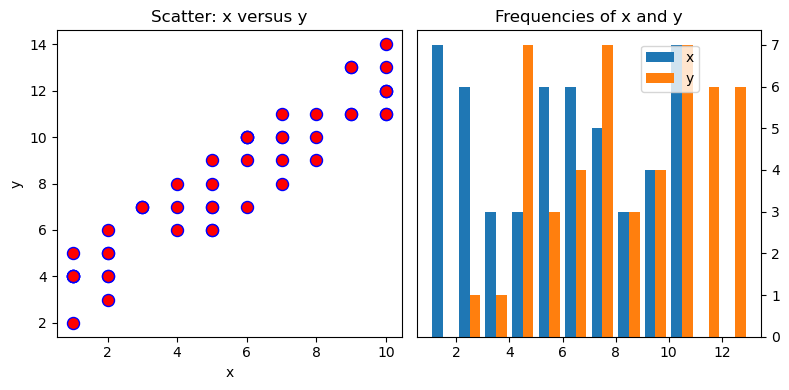

In [19]:
# create a figure with two axes in a row and adjust the overall figure size
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(8, 4))
# make a scatter plot in the first axes (ax1)  
# marker = circle, color = red, edgecolor = blue, size=75 points
ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b', s=75)
ax1.set_title('Scatter: x versus y') # add title to ax1
ax1.set_xlabel('x') # add xlabel to ax1
ax1.set_ylabel('y') # add ylabel to ax1

# now let's work on the second axes (ax2)
ax2.hist(data, bins=np.arange(data.min(), data.max()),label=('x', 'y')) #define a histogram
ax2.legend(loc=(0.65, 0.8)) #by using "label" in hist() we can now show a legend, location at 65% in horizontal and 80% in vertical direction
ax2.set_title('Frequencies of x and y') # add title to ax2
ax2.yaxis.tick_right() # place the y-axis ticks on the right side rather than left

fig.tight_layout() # keep axes tight together but avoid overlap

## More advanced layouts (span rows and/or columns)

If you need more advanced layout beyond simple grids of graphs, then Matplotlib’s **gridspec** module allows for more subplot customization. Pyplot’s **subplot2grid()** interacts with this module. 

Say we want this setup:  
<img src="../images/10_fig2.png" alt="fig vs axes" width="300px">

Set it up like a 3 row x 2 column grid (as shown below) then allow **ax1** to span 2 columns and 2 rows:  
Notice below the numbering of the grid.  The upper left plot is at location **(0,0)** and the lower right would be **(2,1)**.  
<img src="../images/10_fig3a.png" alt="fig vs axes" width="400px">

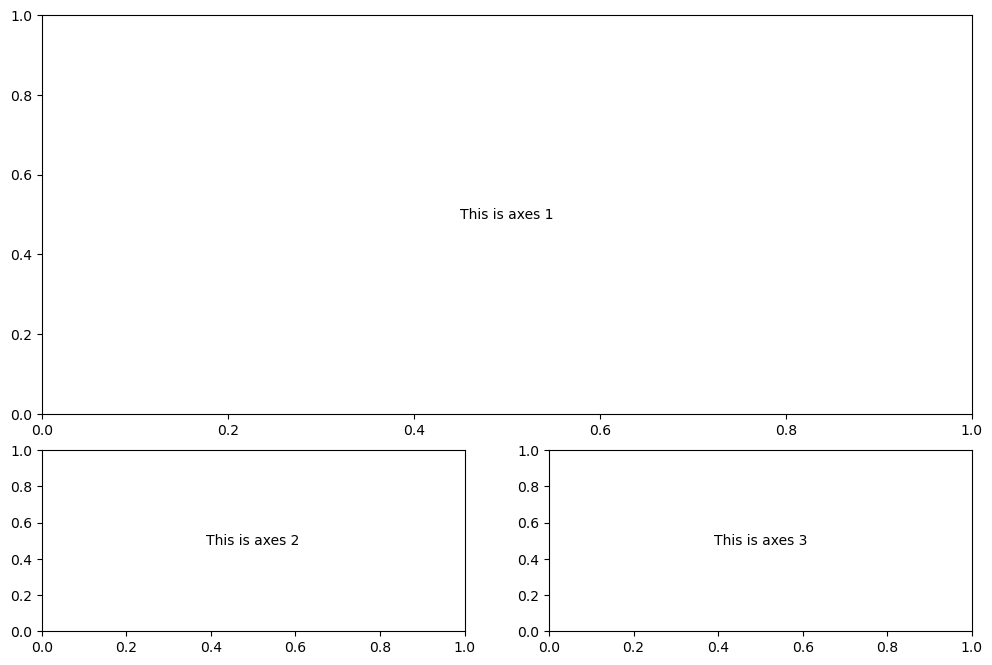

In [20]:
gridsize = (3, 2) # 3 rows x 2 columns
fig = plt.figure(figsize=(12, 8)) #overall size of figure contains total grid 3x2
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2) # start at axes (0,0) and span 2 col and 2 rows
ax2 = plt.subplot2grid(gridsize, (2, 0)) #3rd row, 1st col
ax3 = plt.subplot2grid(gridsize, (2, 1)) #3rd row, 2nd col
ax1.annotate('This is axes 1',(0.5,0.5), xycoords='axes fraction', va='center', ha='center')
ax2.annotate('This is axes 2',(0.5,0.5), xycoords='axes fraction', va='center', ha='center')
ax3.annotate('This is axes 3',(0.5,0.5), xycoords='axes fraction', va='center', ha='center')
plt.show()

You could make many creative layouts using the simple concepts shown in the previous output.  

## Example 1 California housing data

Let's take a look at some California housing data whose description can be found at https://developers.google.com/machine-learning/crash-course/california-housing-data-description

In [21]:
raw2=pd.read_csv('https://drive.google.com/uc?id=1lcMbOh19eUUhCdvSloNs5mOYLBCMkIgz')

housing=raw2.copy()
housing

,longitude,latitude,housing median age,total rooms,total bedrooms,population,households,median income (10k),median house value
0,-122.23,37.88,41,880,129,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409,741,349,1.8672,84700


In [22]:
y = housing.iloc[:, -1] #home price
pop=housing.loc[:, 'population'] #population
age=housing.loc[:, 'housing median age'] #average age of home

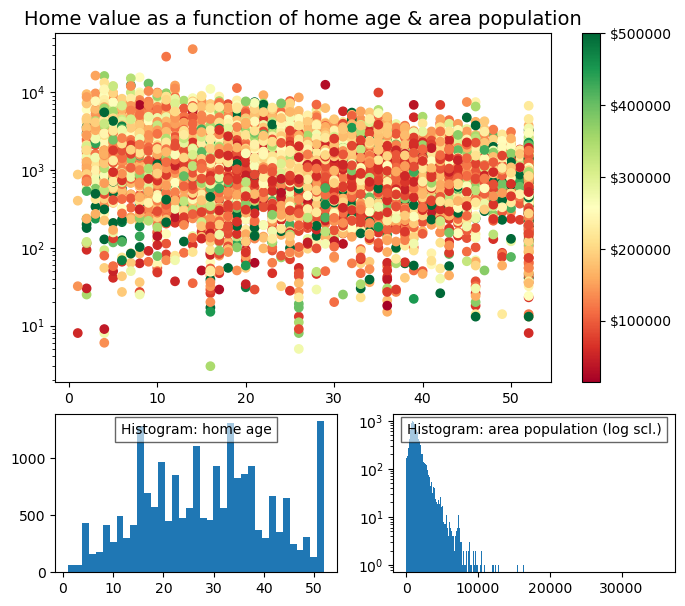

In [23]:
#create layout
gridsize = (3, 2)
fig = plt.figure(figsize=(8, 7)) #overall size of figure
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

#fill layout with plots
ax1.set_title('Home value as a function of home age & area population',fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

ax2.annotate('Histogram: home age',(0.5,0.9), xycoords='axes fraction', va='center', ha='center', bbox=dict(facecolor='white', alpha=0.6),fontsize=10) 

ax3.annotate('Histogram: area population (log scl.)',(0.5,0.9), xycoords='axes fraction', va='center', ha='center', bbox=dict(facecolor='white', alpha=0.6),fontsize=10) 


plt.show()

## Example 2 County income data

In [26]:
raw=pd.read_excel('https://drive.google.com/uc?id=1rmIPRkMAqqfY3TNpWZ13aV4PfuKihguM')
data=raw.copy()
data.columns=['county', 'state', 'households',
       '<10k',
       '10k_15k',
       '15k_25k',
       '25k_35k',
       '35k_50k',
       '50k_75k',
       '75k_100k']
data

,county,state,households,<10k,10k_15k,15k_25k,25k_35k,35k_50k,50k_75k,75k_100k
0,Autauga,Alabama,21397,1417,1172,2219,1684,2721,3817,2931
1,Baldwin,Alabama,80930,4068,3685,7092,8403,11245,14928,10374
2,Barbour,Alabama,9345,1391,796,1641,1092,1331,1239,769
3,Bibb,Alabama,6891,570,554,897,610,1021,1100,1119
4,Blount,Alabama,20847,1706,1145,2199,2600,2921,4050,2497
...,...,...,...,...,...,...,...,...,...,...
4925,Sweetwater,Wyoming,15523,805,645,1202,868,1653,2605,2506
4926,Teton,Wyoming,9019,182,198,667,383,838,1552,1448
4927,Uinta,Wyoming,7597,382,232,559,791,934,1451,1241
4928,Washakie,Wyoming,3365,144,174,286,379,541,710,519


The above data shows the total number of households in each county of each state and a breakdown of the number of households that have an income in one of the indicated ranges.   

For example, 2931 households have an income between 75,000 and 100,000 in Autauga County, Alabama.  This represents 2931/21397*100 = 13.7% of all households in Autauga County.    



## Exercises

### Problem 1

Complete the following steps on the county income data:  

**First,** you need to fix the data set to remove duplicates using ```drop_duplicates()```.  Instead of 4930 rows you should get 3142 records.  

**Determine the following**: 
1. The number of households that have an income greater than 100,000 for each county across the USA.  Add this data to the dataframe.  
2. The percentage of households for each income range for each county, i.e. divide the data for each row by "households" and multiply by 100.  

### Problem 2

Using the cleaned data from Problem 1, plot the following in the layout described below.  

1.  The percentage of households with an income less than 50,000 and the percentage of households with an income greater than 100,000 for every state in the US.  
2.  The same data but now for every county in Virginia.  
3.  A bar chart for the same data but now for Montgomery County, Virginia.  

The three plots should be laid out similar to the figure below where each plot is the same height but plot 1 has a width of 3, plot 2 has a width of 2 and plot 3 has a width of 1.  
<img src="../images/10_exercise_fig.png" alt="fig vs axes" width="500px">